
# Análisis Exploratorio de Datos (EDA) del Titanic

El propósito de este notebook es realizar un Análisis Exploratorio de Datos (EDA) sobre el conjunto de datos del Titanic. 
El EDA es un paso fundamental en el análisis de datos que nos permite entender la estructura, relaciones y anomalías en el conjunto de datos.



## Paso 1: Entender el Conjunto de Datos

Antes de sumergirnos en el análisis, es esencial comprender la estructura básica del conjunto de datos. 
Esto incluye saber cuántas filas y columnas hay, qué tipo de datos contiene cada columna y si hay valores faltantes.


In [3]:

import pandas as pd

# Load the data
titanic_df = pd.read_csv('titanic.csv')

# Display basic information about the dataset
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



## Paso 2: Análisis Univariado

El análisis univariado se refiere al análisis de una sola variable. 
Esto nos ayuda a entender la distribución, la tendencia central y la dispersión de los datos.


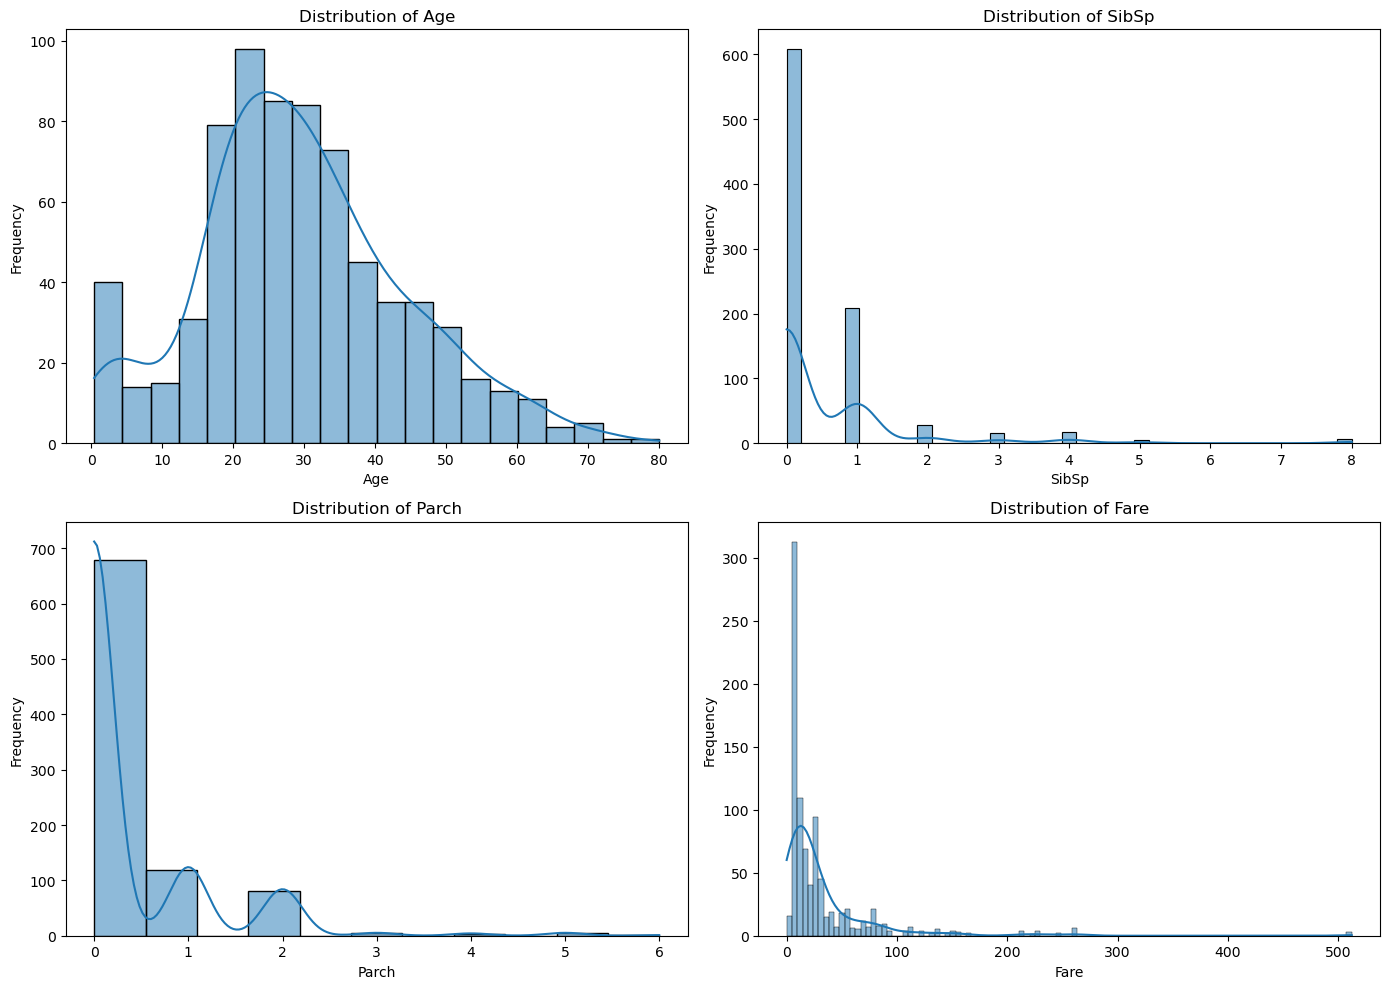

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Variables to be plotted
num_vars = ['Age', 'SibSp', 'Parch', 'Fare']

for i, var in enumerate(num_vars):
    sns.histplot(titanic_df[var], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {var}')
    axes[i//2, i%2].set_xlabel(var)
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



## Paso 3: Análisis Bivariado

El análisis bivariado implica analizar dos variables para determinar la relación entre ellas. 
Por ejemplo, ¿cómo varía la tasa de supervivencia según el género o la clase del pasajero?


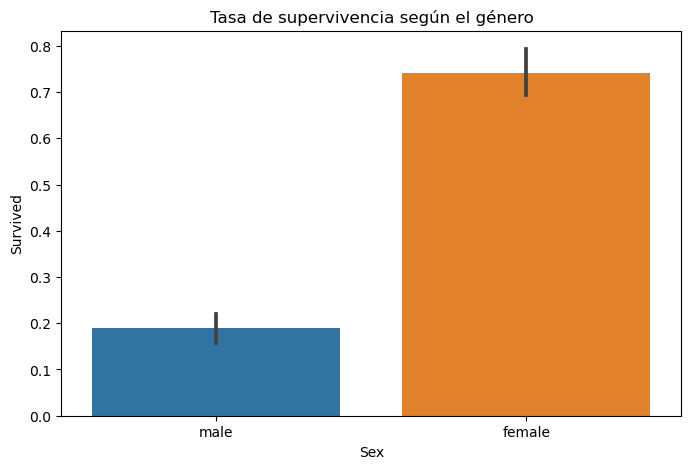

In [5]:

# Survival rate by Sex
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Tasa de supervivencia según el género')
plt.show()



## Paso 4: Visualización

La visualización de datos es una herramienta poderosa que nos permite entender las relaciones y patrones en los datos de una manera que las estadísticas descriptivas no pueden capturar.


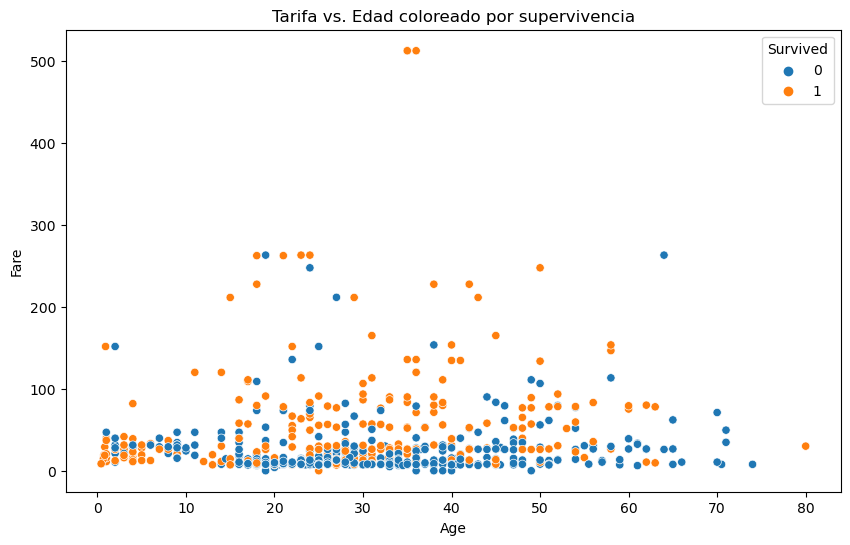

In [6]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.title('Tarifa vs. Edad coloreado por supervivencia')
plt.show()



## Paso 5: Detección de Valores Atípicos

Los valores atípicos son observaciones que se desvían significativamente de otras observaciones en el conjunto de datos. 


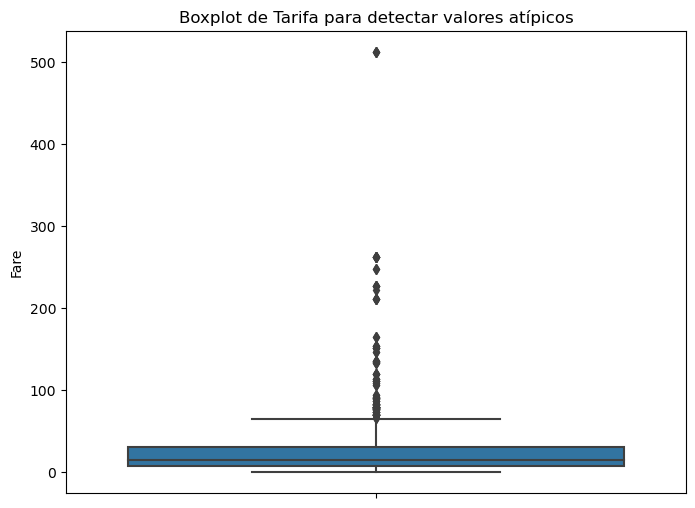

In [7]:

plt.figure(figsize=(8, 6))
sns.boxplot(y='Fare', data=titanic_df)
plt.title('Boxplot de Tarifa para detectar valores atípicos')
plt.show()



## Paso 6: Análisis de Valores Faltantes

Es importante identificar y tratar correctamente los valores faltantes, ya que pueden afectar la calidad y la interpretación de los análisis.


In [8]:

# Summary of missing values
missing_values = titanic_df.isnull().sum()
missing_values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Paso 7: Correlaciones

La correlación es una medida estadística que describe la extensión en la que dos variables cambian juntas.


In [9]:

# Code to compute the correlation matrix only for specific numeric columns:

# Select only numeric columns
numeric_cols = titanic_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr_matrix = numeric_cols.corr()

# Display the correlation matrix
corr_matrix



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


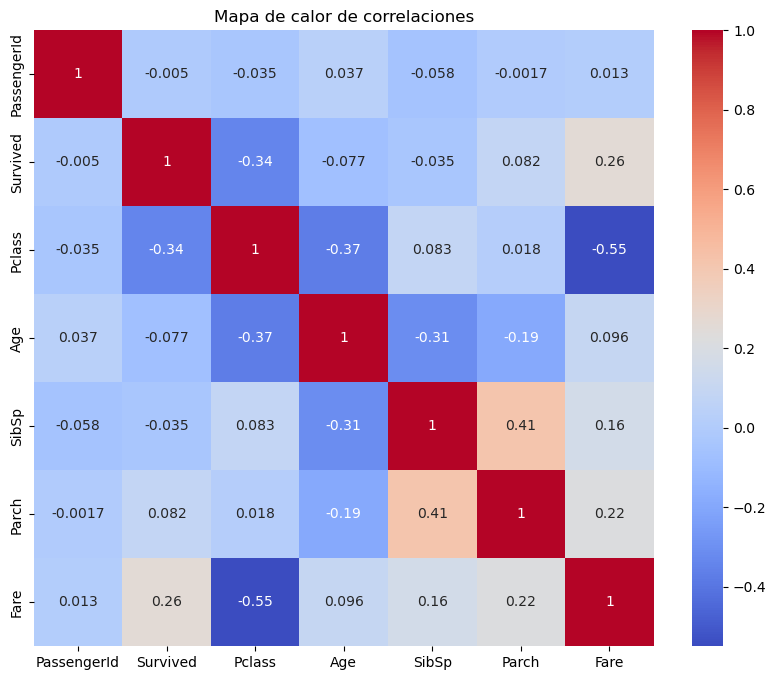

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()
